In [1]:
import numpy as np 
import pandas as pd 
from scipy.stats import mode 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.svm import SVC 
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score, confusion_matrix 
from collections import Counter
import warnings
from sklearn.exceptions import DataConversionWarning
%matplotlib inline

In [2]:
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
Data_path = "Training.csv"
data = pd.read_csv(Data_path)

In [3]:
data.reset_index(drop=True, inplace=True)

In [4]:
data.dropna(axis=1, inplace=True)
print(data.isnull().sum())
print(data["prognosis"].isnull().sum())
data.dropna(subset=["prognosis"], inplace=True)


itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64
0


In [5]:
disease_counts = data["prognosis"].value_counts() 
temp_df = pd.DataFrame({ 
    "Disease": disease_counts.index, 
    "Counts": disease_counts.values 
}) 

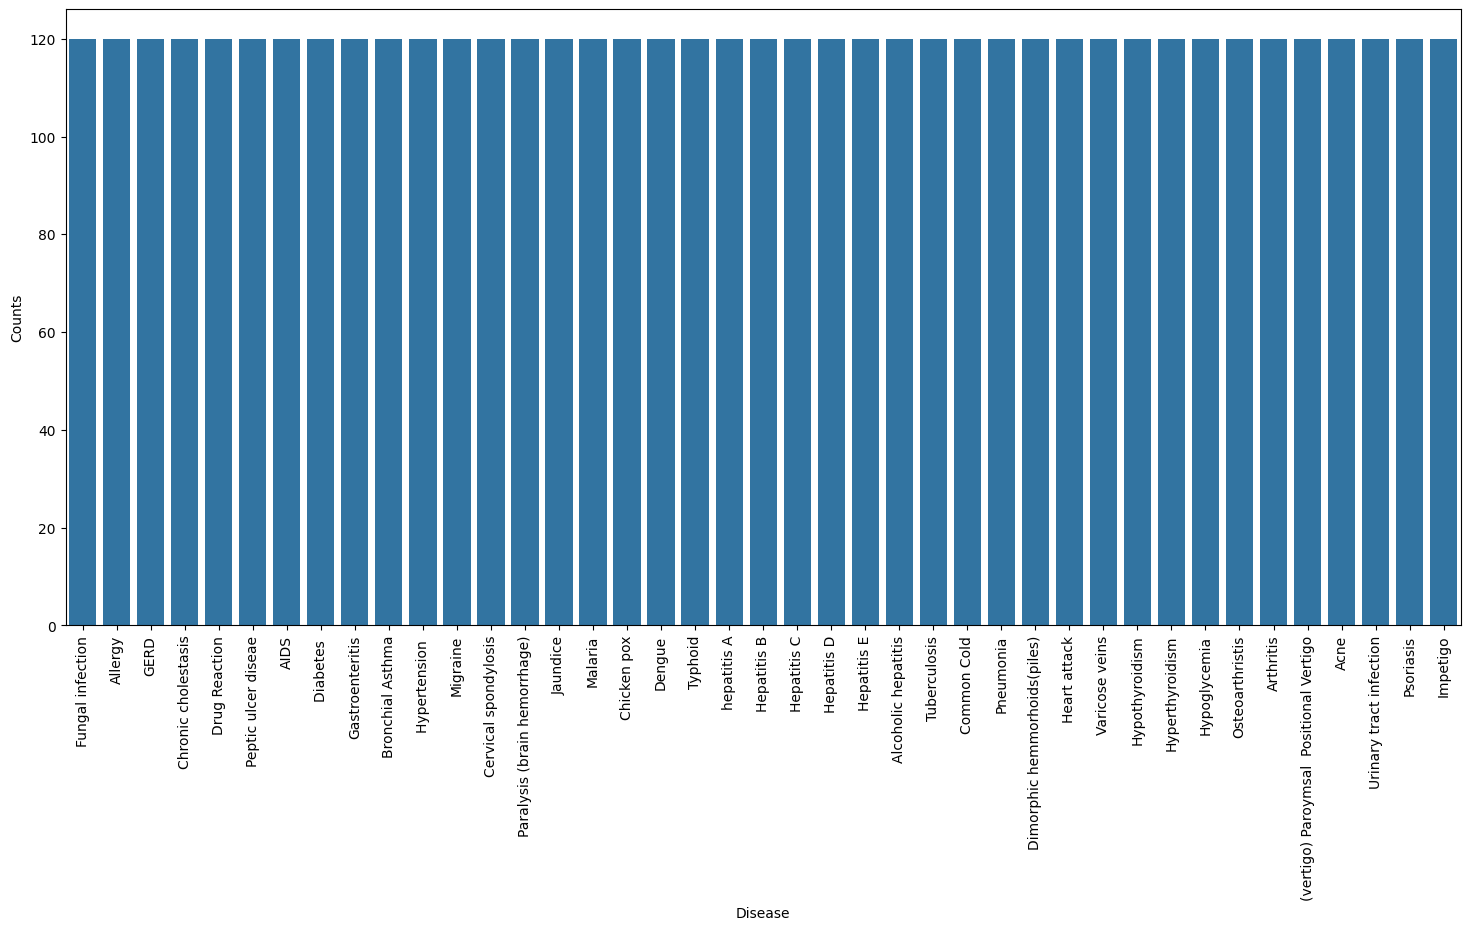

In [6]:
plt.figure(figsize = (18,8)) 
sns.barplot(x = "Disease", y = "Counts", data = temp_df) 
plt.xticks(rotation=90) 
plt.show()

In [7]:
encoder = LabelEncoder()
data["prognosis"] = encoder.fit_transform(data["prognosis"])

In [8]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.2, random_state = 24)
print(f"Train: {X_train.shape}, {y_train.shape}") 
print(f"Test: {X_test.shape}, {y_test.shape}")

Train: (3936, 132), (3936,)
Test: (984, 132), (984,)


In [9]:
def cv_scoring(estimator, X, y): 
    return accuracy_score(y, estimator.predict(X)) 
models = { 
    "SVC":SVC(), 
    "Gaussian NB":GaussianNB(), 
    "Random Forest":RandomForestClassifier(random_state=18) 
} 
for model_name in models: 
    model = models[model_name] 
    scores = cross_val_score(model, X, y, cv = 10, n_jobs = -1,  scoring = cv_scoring) 
    print("=="*70) 
    print(model_name) 
    print(f"Scores: {scores}") 
    print(f"Mean Score: {np.mean(scores)}")

SVC
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
Gaussian NB
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
Random Forest
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0


In [10]:
svc_model = SVC()
svc_model.fit(X_train, y_train)
svc_pred = svc_model.predict(X_test)

In [11]:
print(f"accuracy:{accuracy_score(y_train, svc_model.predict(X_train))*100}")
print(f"accuracy on test:{accuracy_score(y_test ,  svc_model.predict(X_test))*100}")

accuracy:100.0
accuracy on test:100.0


In [12]:
cf_matrix = confusion_matrix(y_test, svc_model.predict(X_test))

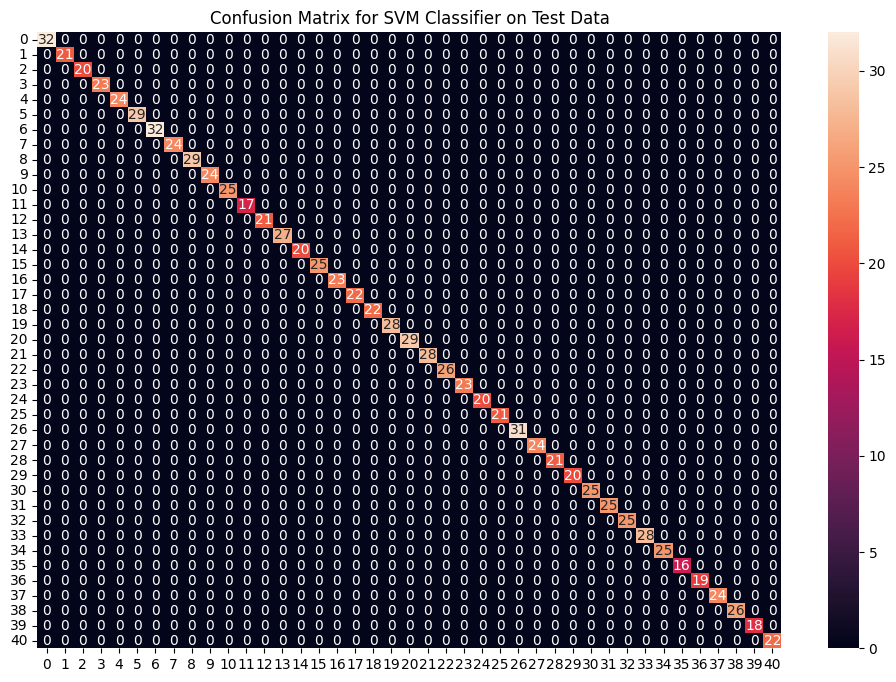

In [13]:
plt.figure(figsize=(12,8)) 
sns.heatmap(cf_matrix, annot=True) 
plt.title("Confusion Matrix for SVM Classifier on Test Data") 
plt.show() 

In [14]:
gaussian_model = GaussianNB()
gaussian_model.fit(X_train , y_train)
pred = gaussian_model.predict(X_test)

In [15]:
cf_matrix_NB = confusion_matrix(y_test, pred)

accuracy on test:100.0
accuracy on train:100.0


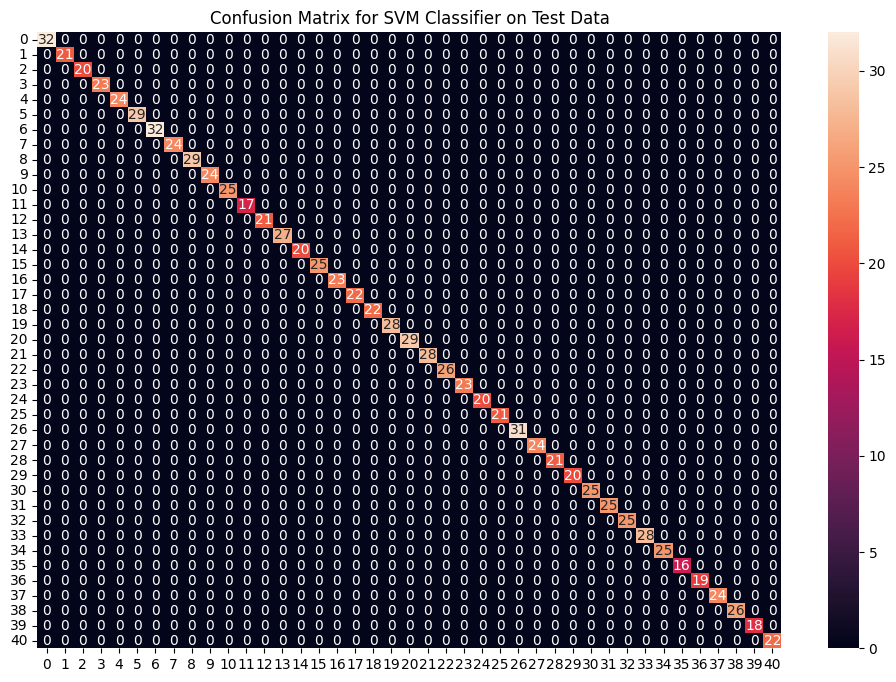

In [16]:
print(f"accuracy on test:{accuracy_score(y_test , gaussian_model.predict(X_test))*100}")
print(f"accuracy on train:{accuracy_score(y_train , gaussian_model.predict(X_train))*100}")
plt.figure(figsize=(12,8)) 
sns.heatmap(cf_matrix_NB, annot=True) 
plt.title("Confusion Matrix for SVM Classifier on Test Data") 
plt.show() 

In [17]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
pred = rf_model.predict(X_train)

In [18]:
rf_confuion_mat = confusion_matrix(y_train , pred)

In [19]:
print(f"accuracy on test:{accuracy_score(y_test, rf_model.predict(X_test))*100}")
print(f"accuracy on train:{accuracy_score(y_train, rf_model.predict(X_train))*100}")


accuracy on test:100.0
accuracy on train:100.0


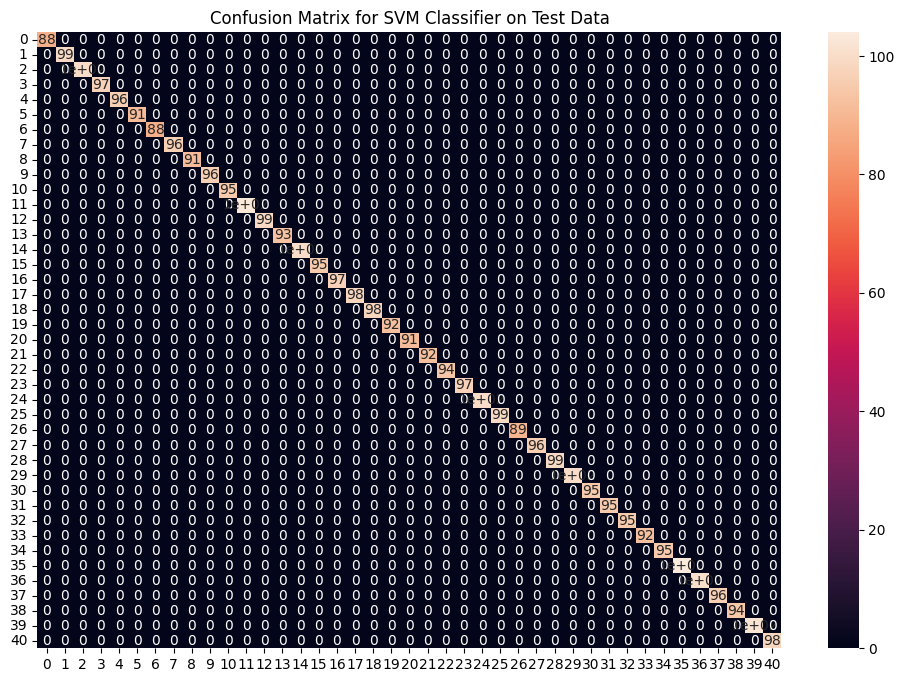

In [20]:
plt.figure(figsize=(12,8)) 
sns.heatmap(rf_confuion_mat, annot=True) 
plt.title("Confusion Matrix for SVM Classifier on Test Data") 
plt.show() 

In [21]:
#final model creation
final_svm_model = SVC()
final_gaussianNB = GaussianNB()
final_rf_model = RandomForestClassifier(random_state=18)
final_svm_model.fit(X.values , y)
final_gaussianNB.fit(X.values, y)
final_rf_model.fit(X.values, y)



RandomForestClassifier(random_state=18)

In [22]:
test_data = pd.read_csv("Testing.csv")


In [23]:
test_data.dropna(axis = 1)

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Peptic ulcer diseae
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,AIDS
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Diabetes
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Gastroenteritis
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Bronchial Asthma


In [24]:
data.dropna(axis=1, inplace=True)
print(test_data.isnull().sum())
print(test_data["prognosis"].isnull().sum())
test_data.dropna(subset=["prognosis"], inplace=True)

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64
0


In [25]:
test_X = test_data.iloc[:, :-1] 
test_y = encoder.transform(test_data.iloc[:, -1])

In [26]:
svc_pred = final_svm_model.predict(test_X)
NB_pred = final_gaussianNB.predict(test_X)
rf_pred = final_rf_model.predict(test_X)

C:\Users\Mannu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
C:\Users\Mannu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(
C:\Users\Mannu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [27]:
predictions = np.array([svc_pred, NB_pred, rf_pred])
final_preds = []
for preds in predictions.T:  # Transpose to iterate through predictions of each classifier for each instance
    mode_pred = Counter(preds).most_common(1)[0][0]
    final_preds.append(mode_pred)

accuracy:100.0


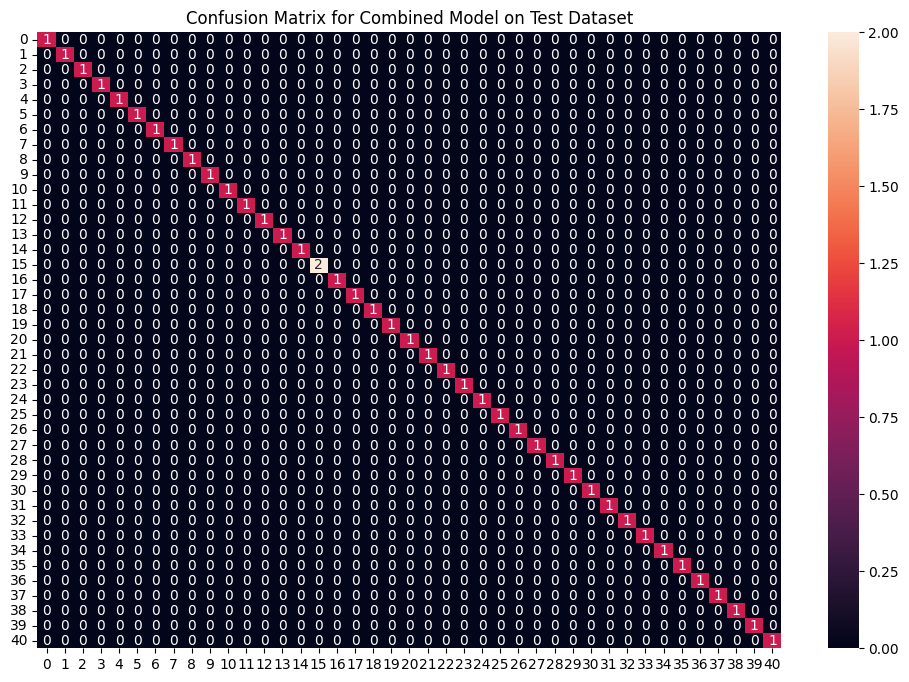

In [28]:
print(f"accuracy:{accuracy_score(test_y, final_preds)*100}")
final_confusion_mat = confusion_matrix(test_y , final_preds)
plt.figure(figsize=(12,8)) 
  
sns.heatmap(final_confusion_mat, annot = True) 
plt.title("Confusion Matrix for Combined Model on Test Dataset") 
plt.show()

In [29]:
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
symptoms = X.columns.values
symptom_index= {}
for index, value in enumerate(symptoms):
    symptom = " ".join([i.capitalize() for i in value.split("_")]) 
    symptom_index[symptom] = index 

In [30]:
data_dict = {
    "symptom_index": symptom_index,
    "predicted_classes": encoder.classes_
}

In [31]:
# Function to predict disease
def prescribed_disease(symptoms):
    symptoms = symptoms.split(',')
    symptoms = [symptom.strip().capitalize() for symptom in symptoms]
    input_data = [0] * len(data_dict["symptom_index"])
    
    for symptom in symptoms:
        index = data_dict["symptom_index"].get(symptom)
        if index is not None:
            input_data[index] = 1
    
    input_data = np.array(input_data).reshape(1, -1)
    
    svc_preds = final_svm_model.predict(input_data)
    NB_preds = final_gaussianNB.predict(input_data)
    rf_preds = final_rf_model.predict(input_data)
    
    final_prediction = mode([rf_preds, NB_preds, svc_preds])[0][0]
    
    predictions = {
        "SVM Prediction": data_dict["predicted_classes"][svc_preds[0]],
        "Gaussian Prediction": data_dict["predicted_classes"][NB_preds[0]],
        "Random_forest Prediction": data_dict["predicted_classes"][rf_preds[0]],
        "Overall Predictions": data_dict["predicted_classes"][final_prediction]
    }
    
    return predictions


In [32]:
user_input = input("Enter symptoms separated by commas: ")
predictions = prescribed_disease(user_input)
print(predictions)

Enter symptoms separated by commas:  Itching,Skin Rash,Nodal Skin Eruptions


{'SVM Prediction': 'Fungal infection', 'Gaussian Prediction': 'Fungal infection', 'Random_forest Prediction': 'Fungal infection', 'Overall Predictions': 'Fungal infection'}
